# Analysis of Human T-helper cells 

In this notebook we analyse the data reported in [1] with some modification. We cosider only the two conditions Th0 and Th2, while cutting out the conditions Th1 because of missing datapoints, which is a feature not yet supported by this software.

 ## 1. Imports
 Importing here all the necessary Python libaries for the preprocessing of the data and the data analysis.  
 The two imports:  
 ```
from core.PairingEffectModel import PairingEffectModel
from core.BaseModel import BaseModel
 ``` 
 allow you to import the classes to analyse gene epression time-series with PairGP.

In [1]:
# Auto reload
%load_ext autoreload
%autoreload 2

from pathlib import Path, PurePath
import sys

source_dir = Path.cwd().parent 
if str(source_dir) not in sys.path:
    sys.path.append(str(source_dir))

In [2]:
import pandas as pd
import numpy as np

from pairgp.PairingEffectModel import PairingEffectModel
from pairgp.BaseModel import BaseModel

In [3]:
colors = ["#00334e", "#801336", "#12d3cf", "#f18c8e", "k", "r"]
subcolors = [
    ["#00334e", "#145374", "#5588a3"],
    ["#801336", "#c72c41", "#ee4540"],
    ["#12d3cf", "#67eaca", "#b0f4e6"],
    ["#f18c8e", "#f0b7a4", "#f1d1b5"],
    ["#00334e", "#145374", "#5588a3"],
]
repcolors = ["#bfcd7e", "#4592af", "#a34a28", "#e3c4a8", "#6c5ce7", "#474141"]
markers = ["o", "x", "*", "d", "+", "v", "^", "s", "<", "."]

 ## 2. Pre-processing
 ### 2.1 Data Format
 The data format accepted in input is a pandas Series (or one row from a DataFrame).  
 If coming from a pandas DataFrame, the name of the columns must be organized with the following structure:
 ```
    condition_timepoint_replicatenum
 ``` 
 So the structure is the name of the condition, the time point (without any sort of indication such as "h" if the time is in hours),  
 and then a number the identifies the replicate from which the data point comes from.
 
 ### 2.2 Data points
 The data points need to be already expressed in the unit that one wants to use. In other words, any sort of transformation on the  
 gene read-counts need to be applied to the dataset before passing the datapoints to this software.

In [4]:
# Importing preprocessed data
data = pd.read_csv("../data/KN_logproc_Th02.csv", sep=",", index_col='AffyProbeSet')

 ## 3.Usage of the class DiffConditionModel

At first, we need to define specific details about the dataset we want to analyse.

In [5]:
conditions = ["Th0" ,"Th2"]       # List of conditions in the dataset
n_replicates = 3                # Number of replicates in the data
timepoints =  [0.5, 1, 2, 4, 6 ,12,24,48,72] # time points vector (common to all conditions)

Then we can create the object to access the data analysis functionalities.

In [6]:
models_folder = "./models/"     # Folder where temporary model files will be saved
gene_name = "1552897_a_at"#"201292_at"  # Gene name
gene_data = data.loc[gene_name] # gene data
gp = PairingEffectModel(        # new model object 
#gp = BaseModel(        # new model object 
    gene_data,
    gene_name,
    timepoints,
    conditions,
    n_replicates,
    models_folder=models_folder,
    colors=colors,
    subcolors=subcolors,
    repcolors=repcolors,
    markers=markers,
)    

### 3.1 Functions & Parameters
The main function we need to use at this point is ```fit```, which need to run the model selection process in order to  
decide which partition of the condition set is better representing the gene provided as input.  
The parameters of this function are:
 - ```timewarping```: through this parameter we specify if a log-transformation on the time points needs to be applied before fitting the model
 - ```use_gpu```: if the computation can be run on GPU, this can be beneficial for the computation time
 - ```k_prior```: to apply hyperprior distributions on the kenrel hyperparameters
 - ```verbose```: to decide whether or not printing all the steps of the computations

In [7]:
gp.fit(
    timewarping=True,
    k_prior=True,
    use_gpu=False,
    verbose = True,
)

100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.20s/it]

Done
Model fitting time: 4.5127928256988525


### 3.2 Plotting the results
Once that the model selection process has completed we can access different information now stored inside the DiffConditionModel object.  
You can access the plotting functionalities already implemented in the package.

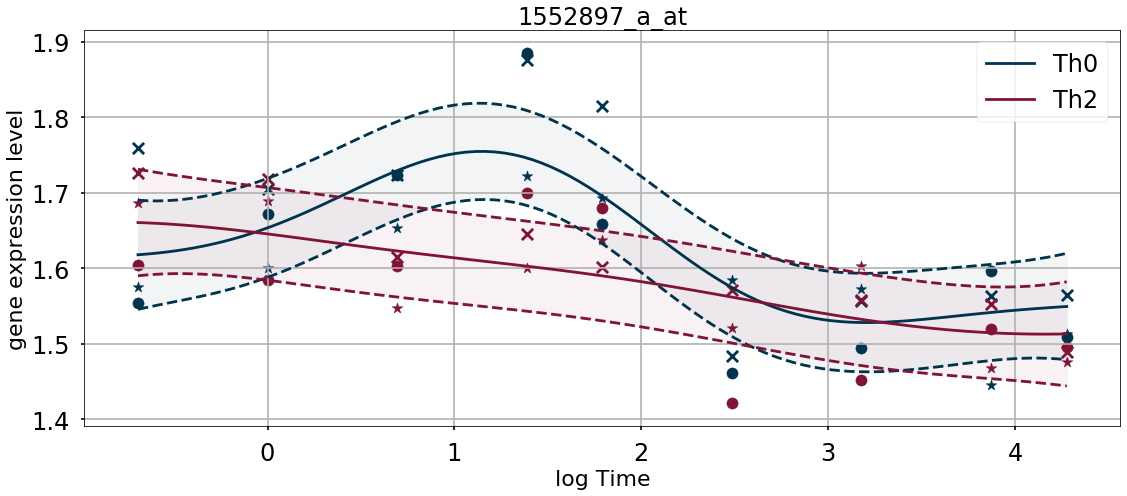

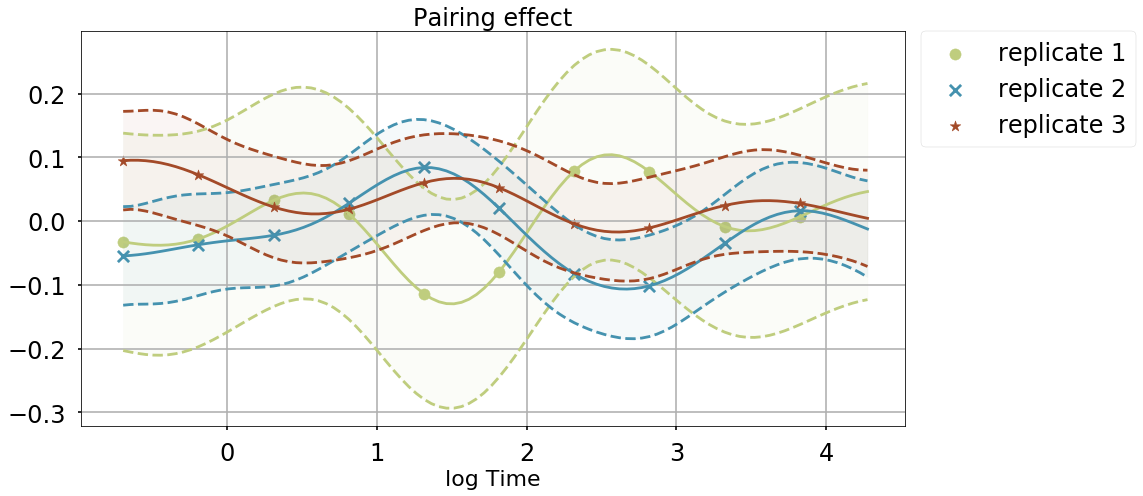

In [8]:
gp.plot()

# References

[1] Laura L Elo, Henna Järvenpää, Soile Tuomela, Sunil Raghav, Helena Ahlfors,  
    Kirsti Laurila, Bhawna Gupta, Riikka J Lund, Johanna Tahvanainen, R DavidHawkins, et al.   
    Genome-wide profiling of interleukin-4 and stat6 transcriptionfactor regulation  
    of human th2 cell programming.Immunity, 32(6):852–862,2010